In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("Mall_Customers.csv",index_col='CustomerID')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [10]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [11]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [12]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

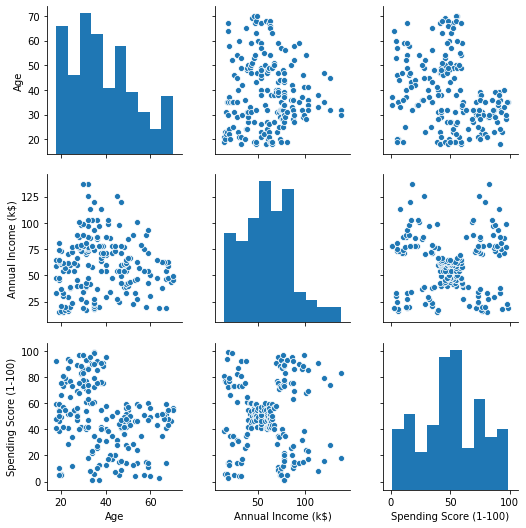

In [13]:
sns.pairplot(df)

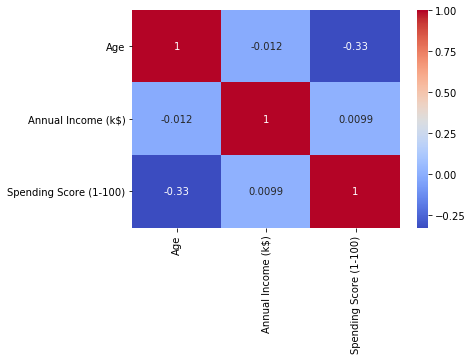

In [15]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

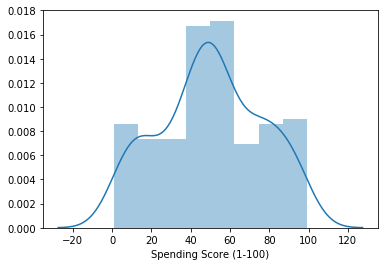

In [19]:
sns.distplot(df['Spending Score (1-100)'])

In [21]:
df.columns=['Gender','Age','Income','Score']

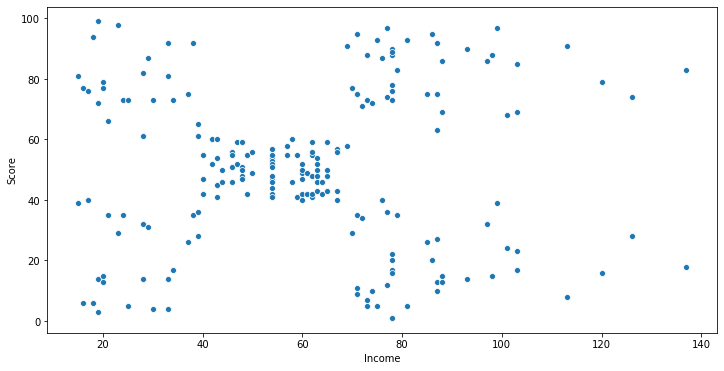

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Income',y='Score',data=df)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
df_scaled=scaler.fit_transform(df.drop('Gender',axis=1))

In [30]:
df_scaled=pd.DataFrame(df_scaled)

In [32]:
df_scaled.columns=['Age','Income','Score']

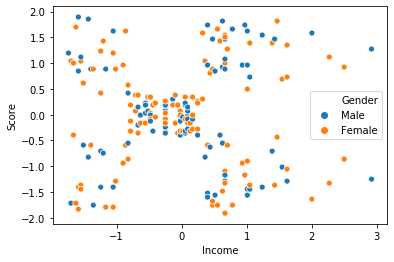

In [37]:
sns.scatterplot(x='Income',y='Score',data=df_scaled,hue=df['Gender'])

In [38]:
from sklearn.cluster import KMeans

In [53]:
elbow=[]

for i in range (1,10):
    kmeans=KMeans(n_clusters=i,random_state=11)
    kmeans.fit(df.drop(['Age','Gender'],axis=1))
    elbow.append(kmeans.inertia_)

Text(0.5, 0, '# Cluster')

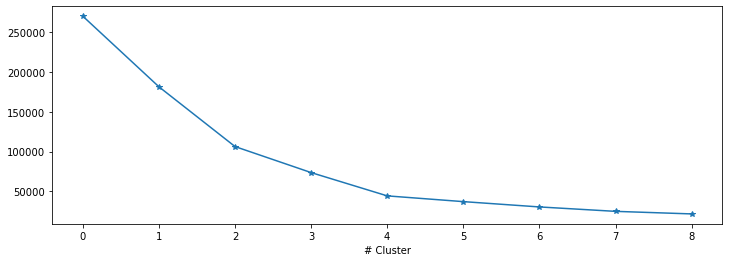

In [54]:
curve= [i for i in (elbow)]
plt.figure(figsize=(12,4))
plt.plot(curve,'-*')
plt.xlabel('# Cluster')

In [56]:
kmeans= KMeans(n_clusters=5,random_state=101)
cluster=kmeans.fit_predict(df_scaled.drop('Age',axis=1))
cluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

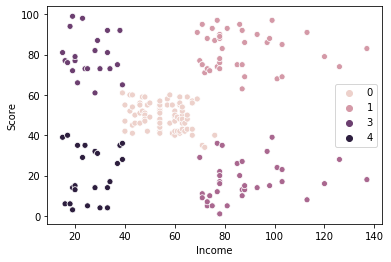

In [57]:
sns.scatterplot(x='Income',y='Score',data=df,hue=cluster)